# Example on Knapsack Problem

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os

os.chdir('../src')
from trainer import Trainer

%load_ext autoreload
%autoreload 2

In [53]:
seed = 42
num_generations = 10
pop_size = 20
crossover_rate = 0.9
mutation_rate = 0.1

np.random.seed(seed)

N = 15
weights = np.random.choice(np.arange(9) + 1, N, replace=True)
values = np.random.permutation(N) + 1
cap = int(0.3 * weights.sum())

print('Cap     :', cap)
print('Weights :', weights)
print('Values  :', values)

Cap     : 26
Weights : [7 4 8 5 7 3 7 8 5 4 8 8 3 6 5]
Values  : [ 7  3  9 14 10 13 11  4  1  5 15  6 12  8  2]


In [54]:
def fitness(chromosome):
    genotype = chromosome.genotype
    mask = np.where(genotype == 1)
    v, w = values[mask], weights[mask]
    if w.sum() > cap:
        return 0
    return v.sum()

trainer = Trainer(
    chromosome_type='binary',
    chromosome_length=N,
    fitness_function=fitness,
    pop_size=pop_size,
    selection='rws',
    crossover_rate=crossover_rate,
    mutation_rate=mutation_rate,
    seed=seed
)

history = trainer.run(num_generations=num_generations)

Iteration   [0] ---- Best Fitness: 34.00 ---- Average Fitness: 22.20
Iteration   [1] ---- Best Fitness: 34.00 ---- Average Fitness: 26.35
Iteration   [2] ---- Best Fitness: 34.00 ---- Average Fitness: 27.15
Iteration   [3] ---- Best Fitness: 36.00 ---- Average Fitness: 23.90
Iteration   [4] ---- Best Fitness: 36.00 ---- Average Fitness: 26.45
Iteration   [5] ---- Best Fitness: 36.00 ---- Average Fitness: 23.45
Iteration   [6] ---- Best Fitness: 36.00 ---- Average Fitness: 22.95
Iteration   [7] ---- Best Fitness: 36.00 ---- Average Fitness: 24.90
Iteration   [8] ---- Best Fitness: 46.00 ---- Average Fitness: 26.60
Iteration   [9] ---- Best Fitness: 46.00 ---- Average Fitness: 27.60
Best generation : 9
Best fitness    : 46
Best chromosome : array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])


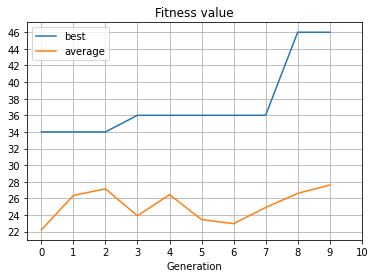

In [55]:
plt.plot(history['best'], label='best')
plt.plot(history['average'], label='average')

step = num_generations // 10
plt.xticks(range(0, num_generations + step, step))

lo, hi = int(min(history['average'])), max(history['best'])
step = max((hi - lo) // 10, 1)
plt.yticks(range(lo, hi + step, step))

plt.grid()
plt.legend()
plt.xlabel('Generation')
plt.title('Fitness value')
plt.show()